# DEV - CoolProp Utils

`CoolProp` version: `6.4.1`

- [ ] `#a` fluid properties calculations
- [ ] `#a` mixture definition
- [ ] `#a` ph diagram with compression cycle (any number of points)

In [1]:
%load_ext autoreload
%autoreload 2

import sys; sys.path.extend(['..', '../../..'])

import CoolProp as CP
from CoolProp.CoolProp import PropsSI
from obj.coolprop_utils import ph_diagram, R513a

print(f"CoolProp version: {CP.__version__}")

CoolProp version: 6.6.0


## ph Diagram

<u>Important!</u>: for **user-defined mixtures** the pressure and temperature values defining the **critical point** must be provided.

`[p, t, x]`

- `p`: relative pressure [barg]
- `t`: temperature [degC]
- `x`: vapour quality [0-1]

### R134a

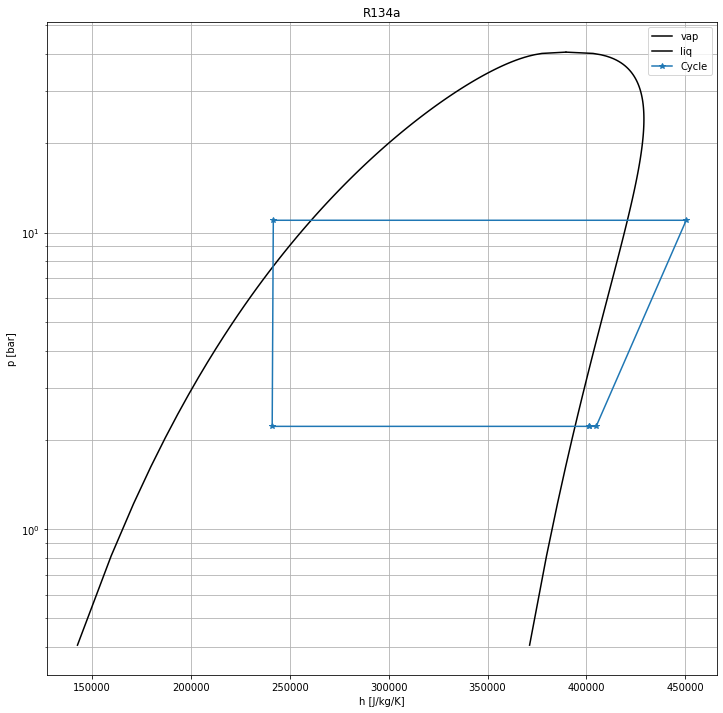

In [22]:
ref = 'R134a'
points = [
	      [1.22,  1], # Evap out
	      [1.22,  5], # Compr in
          [10, 70], # Compr out
          [10, 30], # Cond out
          # [], # Valve in
          [1.22, None, 0.25], # Valve out
	     ]
ph_diagram(ref, points=points)

### R513a

R1234yf[0.56]&R134a[0.44] already added to library
	 CAS pair(754-12-1,811-97-2) already in binary interaction map; considering enabling configuration key OVERWRITE_BINARY_INTERACTION


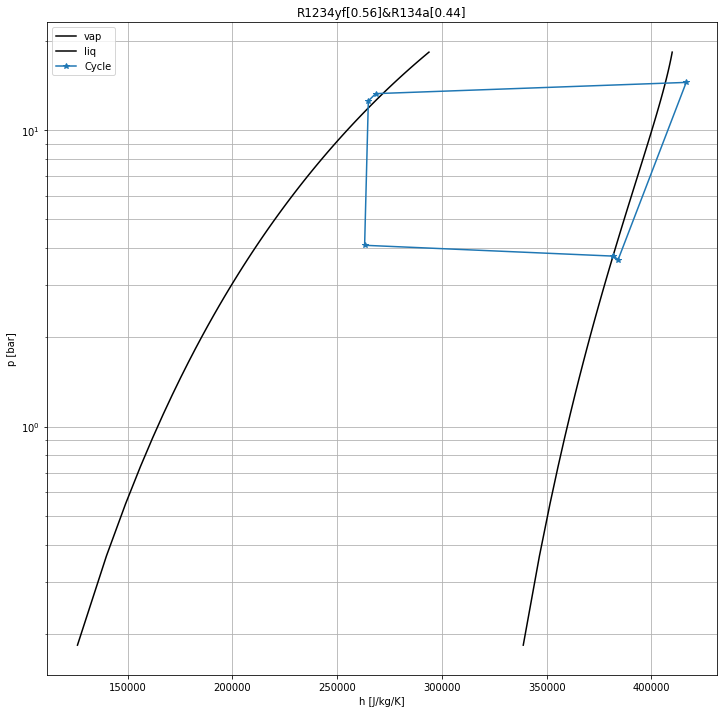

In [35]:
ref = R513a()
TCRIT = 96.5
# PCRIT = PropsSI('P', 'Q', 1, 'T', TCRIT - 5 + 273.15, ref)
PCRIT = 3666 * 0.5 * 1e3 # [kPa] abs -> [Pa] abs
# PCRIT = 40 * 1e5
points = [
	[2.76,  4.4+2], # Evap out
    [2.66,  3.5+5], # Compr in
	[13.49, 52.1 + 10], # Compr out
	[12.28, 48.5], # Cond out
	[11.55, 46.2], # Valve in
	[3.09,  None, 0.3] # Valve out
	# [3.09,  6.9] # Valve out
]
ph_diagram(ref, points=points, pcrit=PCRIT, tcrit=TCRIT)

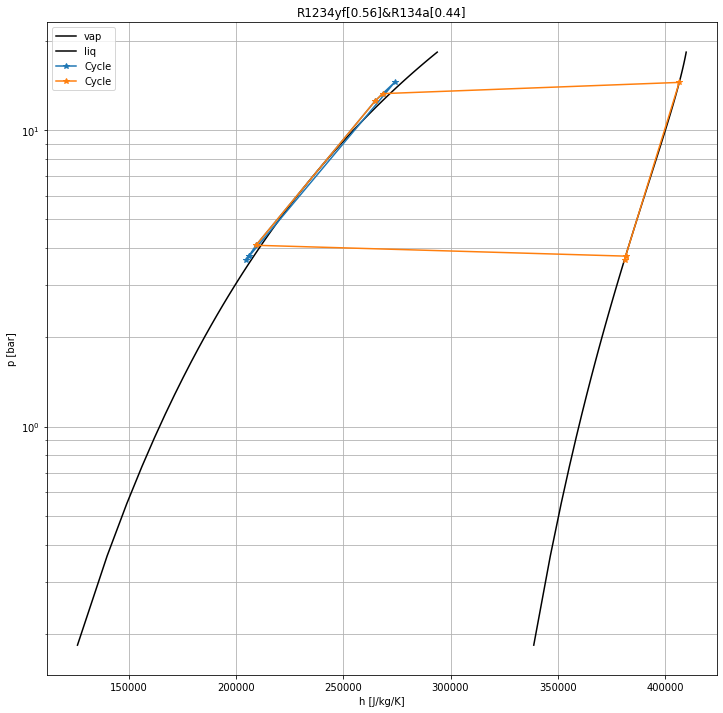

In [37]:
points = {'std': [
				  [2.76,  4.4], # Evap out
				  [2.66,  3.5], # Compr in
				  [13.49, 52.1], # Compr out
				  [12.28, 48.5], # Cond out
				  [11.55, 46.2], # Valve in
				  [3.09,  6.9] # Valve out
				 ],
          'ht': [
				  [2.76,  None, 1], # Evap out
				  [2.66,  None, 1], # Compr in
				  [13.49, None, 1], # Compr out - higher temp
				  [12.28, 48.5], # Cond out
				  [11.55, 46.2], # Valve in
				  [3.09,  6.9] # Valve out             
		        ]}
ph_diagram(ref, points=points, pcrit=PCRIT, tcrit=TCRIT)